# Workhorse Word Context Vectors in Parallel

#### By Jo Guldi

## Parallelizing

In [1]:
from multiprocessing import Pool

In [2]:
def parallelize_operation(df, func, n_cores=29):
    df_split = np.array_split(df, n_cores)
    pool = Pool(n_cores)
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()
    return df

In [3]:
startdate = "1890"
enddate = "2010"

## Word Embeddings with GENSIM

In [4]:
import gensim 

In [18]:
import time

start = time.time()
print("hello")

hello


In [19]:
congress_model = gensim.models.Word2Vec(
    sentences = sentences,
    workers= 29,
    min_count = 100, # remove words stated less than n times
    size = 300) # size of neuralnet layers; default is 100; higher for larger corpora

Commentary on StackExchange: "For example, some research has suggested that using a larger window tends to position the final vectors in a way that's more sensitive to topical/domain similarity, while a smaller window value shifts the word-neighborhoods to be more syntactic/functional drop-in replacements for each other. So depending on your particular project goals, you'd want a different value here."

In [20]:
end = time.time()
print(end - start)

7415.664100885391


In [131]:
#congress_model.save('congress_model-'+str(startdate)+'-'+str(enddate))
congress_model = gensim.models.Word2Vec.load('congress_model-'+str(startdate)+'-'+str(enddate)) # to load a saved model

### What's in a GENSIM word embeddings model?

What's at the top of the model?

In [132]:
congress_model.wv.index2word[:25]

['the',
 'of',
 'to',
 'and',
 'in',
 'that',
 'a',
 'is',
 'i',
 'for',
 'this',
 'it',
 'be',
 'on',
 'have',
 'we',
 'not',
 'from',
 'by',
 'as',
 'are',
 'with',
 'will',
 'which',
 'has']

What's at the bottom?

In [133]:
congress_model.wv.index2word[-25:]

['(o',
 '"official',
 'aspen',
 'dwyer',
 'slant',
 'lifethe',
 'kendall',
 'ballooning',
 'prepay',
 'hallways',
 'gilbertsville',
 'fordham',
 'foreword',
 '2016',
 'coauthors',
 'whitehurst',
 'prensa',
 'stratospheric',
 'feedgrain',
 'nonappropriated',
 'intelsat',
 'highprofile',
 'assad',
 'zimbabwerhodesia',
 'ss20s']

How many unique words is that?

In [134]:
len(congress_model.wv.index2word)

29933

In [9]:
congress_model.wv.vectors

array([[ 3.36743021e+00,  1.22027025e-01, -2.96958709e+00, ...,
        -8.11516523e-01, -3.60680282e-01,  9.90207613e-01],
       [ 1.59818792e+00, -9.43590760e-01, -3.90653634e+00, ...,
        -2.16222000e+00,  2.03373265e+00,  1.50218296e+00],
       [ 7.41740584e-01, -5.09683967e-01, -1.42939508e-01, ...,
         3.79877239e-01,  3.45909834e-01,  3.18151903e+00],
       ...,
       [-1.02270477e-01, -9.66082141e-03,  5.47661399e-03, ...,
        -8.34702849e-02, -5.13248295e-02, -3.26803653e-03],
       [-3.05324271e-02,  4.50915992e-02, -3.43698710e-02, ...,
        -1.50485570e-02, -7.67066851e-02, -9.04920772e-02],
       [-7.48820901e-02, -1.99404377e-02,  6.51781484e-02, ...,
        -4.77996767e-02,  7.81708881e-02,  6.36447370e-02]], dtype=float32)

In [10]:
word = congress_model.wv.index2word[3]
word

'and'

In [11]:
congress_model.wv[word]

array([ 1.76721931e+00, -4.06179316e-02, -2.02633619e+00, -2.68589354e+00,
        1.88973427e+00, -4.99632835e-01, -1.58017445e+00, -3.09578300e-01,
        4.87757295e-01, -3.43524247e-01, -5.88364005e-01, -2.10410285e+00,
        9.40971315e-01, -5.73006153e-01, -1.00470424e+00, -3.94849271e-01,
        2.06472084e-01, -2.06981078e-01,  6.77764893e-01, -1.88662159e+00,
       -5.76430202e-01, -2.68592477e+00, -1.92672312e-01,  1.17401099e+00,
        1.32977164e+00,  2.01957747e-01,  2.02370214e+00, -2.41651320e+00,
        2.76640859e-02, -2.32264018e+00, -2.35453129e+00, -4.87277091e-01,
        1.14529574e+00, -5.56693673e-01, -2.07150862e-01,  5.93877256e-01,
        1.56964469e+00, -1.95517480e-01, -8.42458129e-01,  4.03597295e-01,
        1.07981753e+00, -2.66121298e-01, -1.26147294e+00, -1.61217284e+00,
       -3.55074942e-01,  1.85607564e+00, -1.71099067e+00,  7.87955225e-01,
        2.70486474e-01,  8.92666698e-01, -2.10079598e+00, -1.75171053e+00,
        1.27280641e+00,  

In [12]:
congress_model.wv.vectors[3]

array([ 1.76721931e+00, -4.06179316e-02, -2.02633619e+00, -2.68589354e+00,
        1.88973427e+00, -4.99632835e-01, -1.58017445e+00, -3.09578300e-01,
        4.87757295e-01, -3.43524247e-01, -5.88364005e-01, -2.10410285e+00,
        9.40971315e-01, -5.73006153e-01, -1.00470424e+00, -3.94849271e-01,
        2.06472084e-01, -2.06981078e-01,  6.77764893e-01, -1.88662159e+00,
       -5.76430202e-01, -2.68592477e+00, -1.92672312e-01,  1.17401099e+00,
        1.32977164e+00,  2.01957747e-01,  2.02370214e+00, -2.41651320e+00,
        2.76640859e-02, -2.32264018e+00, -2.35453129e+00, -4.87277091e-01,
        1.14529574e+00, -5.56693673e-01, -2.07150862e-01,  5.93877256e-01,
        1.56964469e+00, -1.95517480e-01, -8.42458129e-01,  4.03597295e-01,
        1.07981753e+00, -2.66121298e-01, -1.26147294e+00, -1.61217284e+00,
       -3.55074942e-01,  1.85607564e+00, -1.71099067e+00,  7.87955225e-01,
        2.70486474e-01,  8.92666698e-01, -2.10079598e+00, -1.75171053e+00,
        1.27280641e+00,  

#### Inspecting Word Context with the GENSIM model, one word at a time

The GENSIM model has all sorts of tools built in for navigating and inspecting 

In [13]:
man_vector = congress_model.wv['man']
congress_model.wv.similar_by_vector(man_vector)

[('man', 1.0),
 ('person', 0.7530879974365234),
 ('woman', 0.7480330467224121),
 ('soldier', 0.6768587827682495),
 ('guy', 0.6756148338317871),
 ('mal', 0.6627358198165894),
 ('mani', 0.658414363861084),
 ('man?', 0.6481967568397522),
 ('politician', 0.645797610282898),
 ('nman', 0.6412488222122192)]

In [14]:
woman_vector = congress_model.wv['woman']
congress_model.wv.similar_by_vector(woman_vector)

[('woman', 0.9999999403953552),
 ('man', 0.7480330467224121),
 ('person', 0.7221779823303223),
 ('girl', 0.7064642310142517),
 ('lady', 0.6938865184783936),
 ('teenager', 0.6715378165245056),
 ('soldier', 0.6486788988113403),
 ('mother', 0.6419939994812012),
 ('citizen', 0.6385281085968018),
 ('boy', 0.6313489675521851)]

In [15]:
individual_vector = congress_model.wv['individual']
congress_model.wv.similar_by_vector(individual_vector)

[('individual', 1.0000001192092896),
 ('employer', 0.5778648257255554),
 ('employee', 0.5756088495254517),
 ('individuals', 0.5451551079750061),
 ('applicant', 0.5408613681793213),
 ('person', 0.539200484752655),
 ('individual?', 0.5017203688621521),
 ('indivdual', 0.4977978467941284),
 ('alien', 0.49481201171875),
 ('indvidual', 0.49223244190216064)]

In [16]:
soldier_vector = congress_model.wv['soldier']
congress_model.wv.similar_by_vector(soldier_vector)

[('soldier', 1.0),
 ('serviceman', 0.8121154308319092),
 ('sailor', 0.7691320776939392),
 ('veteran', 0.7446230053901672),
 ('soldier?', 0.729470431804657),
 ('man', 0.6768587827682495),
 ('seaman', 0.6686913967132568),
 ('citizen', 0.6624431610107422),
 ('solider', 0.6612852215766907),
 ('soldiers', 0.6566002368927002)]

### Distance and Similarity with Vectors in GENSIM

In [17]:
congress_model.wv.similarity('women', 'men')

0.57621485

#### What other words have similar context vectors?

In [18]:
congress_model.wv.most_similar("women", topn = 50)

[('mothers', 0.6528209447860718),
 ('womenwho', 0.6511432528495789),
 ('womenand', 0.6431899666786194),
 ('families', 0.6162963509559631),
 ('girls', 0.6130220890045166),
 ('adults', 0.6038228273391724),
 ('women?', 0.6033554673194885),
 ('boys', 0.5964587926864624),
 ('youths', 0.593612790107727),
 ('teenagers', 0.5929088592529297),
 ('negroes', 0.5916906595230103),
 ('africanamericans', 0.588591992855072),
 ('women:', 0.5882108211517334),
 ('citizens', 0.5786811113357544),
 ('womento', 0.576485276222229),
 ('men', 0.5762147903442383),
 ('wives', 0.5750499963760376),
 ('womenare', 0.5726450681686401),
 ('females', 0.5663079023361206),
 ('americans', 0.5648036003112793),
 ('children', 0.5607912540435791),
 ('blacks', 0.5602506995201111),
 ('individuals', 0.5548871755599976),
 ('-women', 0.5491616725921631),
 ('womenthe', 0.5476874113082886),
 ('students', 0.5458366274833679),
 ('womenespecially', 0.5377309918403625),
 ('lesbians', 0.5375551581382751),
 ('soldiers', 0.5372450351715088),

In [19]:
congress_model.wv.most_similar("men", topn = 50)

[('servicemen', 0.6872543096542358),
 ('soldiers', 0.6766828298568726),
 ('people', 0.6731841564178467),
 ('patriots', 0.6662353277206421),
 ('menand', 0.6616204977035522),
 ('inen', 0.6597763299942017),
 ('boys', 0.6579494476318359),
 ('men?', 0.6558233499526978),
 ('lads', 0.6500446796417236),
 ('-men', 0.645419180393219),
 ('americans', 0.6431547403335571),
 ('warriors', 0.6284920573234558),
 ('americansmen', 0.6212527751922607),
 ('nen', 0.619227409362793),
 ('airmen', 0.6127061247825623),
 ('men:', 0.6121300458908081),
 ('nien', 0.6116636991500854),
 ('heroes', 0.6081672310829163),
 ('peoplemen', 0.6068456172943115),
 ('menwho', 0.6064774990081787),
 ('gis', 0.6019876003265381),
 ('athletes', 0.6002320051193237),
 ('ien', 0.6001529097557068),
 ('menmen', 0.595799446105957),
 ('menthe', 0.5911371111869812),
 ('mien', 0.5856657028198242),
 ('lnen', 0.5853078365325928),
 ('men-', 0.5849158763885498),
 ('irishmen', 0.584291398525238),
 ('youngsters', 0.58018958568573),
 ('iien', 0.577

#### Interpreting vector similarity

In [20]:
congress_model.wv.most_similar("america", topn = 50)

[('american', 0.6494813561439514),
 ('america?', 0.6346823573112488),
 ('americas', 0.6280947923660278),
 ('country', 0.6175122261047363),
 ('nation', 0.6049259901046753),
 ('america:', 0.6011619567871094),
 ('americathe', 0.5877195000648499),
 ('americaand', 0.5859531760215759),
 ('americaa', 0.5479741096496582),
 ('americato', 0.5418002009391785),
 ('amerlea', 0.5404280424118042),
 ('africa', 0.5299691557884216),
 ('americais', 0.5214042663574219),
 ('world', 0.5202622413635254),
 ('europe', 0.5114139914512634),
 ('americaour', 0.5102530121803284),
 ('americawith', 0.509596049785614),
 ('-america', 0.5067573189735413),
 ('americafor', 0.5046859383583069),
 ('americabut', 0.50356525182724),
 ('americathat', 0.5031418800354004),
 ('americain', 0.5028696060180664),
 ('americaare', 0.4925367832183838),
 ('americait', 0.4885205924510956),
 ('democracy', 0.48484647274017334),
 ('americaall', 0.476890504360199),
 ('america-', 0.4730854630470276),
 ('amerlca', 0.46923571825027466),
 ('italy'

In [21]:
congress_model.wv.most_similar("iraq", topn = 50)

[('afghanistan', 0.8554083704948425),
 ('bosnia', 0.8524320125579834),
 ('kosovo', 0.8080857992172241),
 ('somalia', 0.8059446811676025),
 ('cambodia', 0.8022921085357666),
 ('lebanon', 0.7678136825561523),
 ('indochina', 0.7592602372169495),
 ('laos', 0.7412384748458862),
 ('angola', 0.7369263768196106),
 ('nicaragua', 0.7285302877426147),
 ('haiti', 0.7241932153701782),
 ('vietnam', 0.7008052468299866),
 ('balkans', 0.6932708024978638),
 ('kuwait', 0.6842206120491028),
 ('korea', 0.6579875349998474),
 ('chechnya', 0.6503011584281921),
 ('pakistan', 0.646950364112854),
 ('iraq?', 0.6461478471755981),
 ('iran', 0.6457234621047974),
 ('thailand', 0.6396896243095398),
 ('sudan', 0.6384646892547607),
 ('baghdad', 0.6369880437850952),
 ('iraq:', 0.6351897120475769),
 ('bosniaherzegovina', 0.6309971809387207),
 ('yugoslavia', 0.6307043433189392),
 ('honduras', 0.6256054043769836),
 ('mideast', 0.6244016289710999),
 ('yemen', 0.6228438019752502),
 ('ethiopia', 0.6182367205619812),
 ('cuba', 

In [22]:
congress_model.wv.most_similar("britain", topn = 50)

[('japan', 0.6827764511108398),
 ('britains', 0.6685506105422974),
 ('france', 0.6565794944763184),
 ('britain?', 0.6394153833389282),
 ('russia', 0.6359982490539551),
 ('italy', 0.6327352523803711),
 ('spain', 0.6302233934402466),
 ('britian', 0.6238901615142822),
 ('india', 0.6175938844680786),
 ('germany', 0.6010090112686157),
 ('belgium', 0.5959302186965942),
 ('egypt', 0.587704062461853),
 ('portugal', 0.5876626968383789),
 ('norway', 0.5809543132781982),
 ('turkey', 0.5735188722610474),
 ('austria', 0.5705769062042236),
 ('brazil', 0.5647776126861572),
 ('denmark', 0.5633741617202759),
 ('sweden', 0.5618299841880798),
 ('china', 0.5614135265350342),
 ('indonesia', 0.5603060722351074),
 ('finland', 0.5588592290878296),
 ('britainthe', 0.5582795143127441),
 ('greece', 0.5581820607185364),
 ('australia', 0.5578643083572388),
 ('britain:', 0.5574976205825806),
 ('canada', 0.555077075958252),
 ('britainand', 0.5453286170959473),
 ('algeria', 0.5339920520782471),
 ('argentina', 0.53358

## Subtracting Similarity Vectors from GENSIM

In [23]:
diff = congress_model.wv['man'] - congress_model.wv['woman']
congress_model.wv.similar_by_vector(diff, topn=40)

[('man', 0.5314687490463257),
 ('guy', 0.33557552099227905),
 ('servant', 0.3280964493751526),
 ('bulldog', 0.31392350792884827),
 ('humility', 0.30187106132507324),
 ('sticktoitiveness', 0.30101001262664795),
 ('histrionic', 0.2985978126525879),
 ('courageand', 0.2977556586265564),
 ('deathless', 0.2970088720321655),
 ('selfeffacement', 0.2957213521003723),
 ('warrior', 0.28934186697006226),
 ('statesmanship', 0.28844261169433594),
 ('men', 0.28835394978523254),
 ('brilliance', 0.28691211342811584),
 ('peacemaker', 0.2863009572029114),
 ('unerring', 0.28620609641075134),
 ('retentive', 0.2841765880584717),
 ('menmen', 0.2828930616378784),
 ('haman', 0.280449241399765),
 ('reverance', 0.27763816714286804),
 ('gentleness', 0.27688372135162354),
 ('possessed', 0.27672311663627625),
 ('sublimer', 0.27627378702163696),
 ('brilliancy', 0.27609241008758545),
 ('magician', 0.2759879529476166),
 ('manand', 0.2758583724498749),
 ('neverfailing', 0.2757326364517212),
 ('westerner', 0.27332288026

In [24]:
diff = congress_model.wv['woman'] - congress_model.wv['man']
congress_model.wv.similar_by_vector(diff, topn = 40)

[('womena', 0.3321291208267212),
 ('drugexposed', 0.31431931257247925),
 ('medicaideligible', 0.31377869844436646),
 ('lactating', 0.3099464774131775),
 ('hardtoplace', 0.3042204976081848),
 ('women:', 0.30012691020965576),
 ('unwed', 0.29542219638824463),
 ('female', 0.2926138937473297),
 ('unmarried', 0.29177844524383545),
 ('nonpregnant', 0.29161134362220764),
 ('specialneeds', 0.2856276333332062),
 ('exservice', 0.28049424290657043),
 ('incomeeligible', 0.27883684635162354),
 ('childless', 0.2778915762901306),
 ('nonoffending', 0.2741468846797943),
 ('either', 0.2721298635005951),
 ('womenthe', 0.270698606967926),
 ('cohabitating', 0.2701960802078247),
 ('medicaidfunded', 0.26928281784057617),
 ('handicaped', 0.2684461772441864),
 ('women?', 0.2677367925643921),
 ('noninstitutionalized', 0.2669339179992676),
 ('secondtrimester', 0.266430139541626),
 ('hivinfected', 0.26565250754356384),
 ('trimester', 0.2635498046875),
 ('bisexual', 0.25947171449661255),
 ('drugaddicted', 0.2593543

## Studying Changing Word Context over Time with GENSIM Word Embeddings

In [157]:
keyword1 = 'tax'  # define the keyword you're looking for. you can change this variable as many times as you want.

In [158]:
periods = range(1890,2015,5)
periodnames = []
for period in periods:
    periodnames.append(str(period)+'.0')
periodnames

['1890.0',
 '1895.0',
 '1900.0',
 '1905.0',
 '1910.0',
 '1915.0',
 '1920.0',
 '1925.0',
 '1930.0',
 '1935.0',
 '1940.0',
 '1945.0',
 '1950.0',
 '1955.0',
 '1960.0',
 '1965.0',
 '1970.0',
 '1975.0',
 '1980.0',
 '1985.0',
 '1990.0',
 '1995.0',
 '2000.0',
 '2005.0',
 '2010.0']

In [114]:
keyword_context = [] # create an empty dummy variable

for period1 in periodnames:

    # just the sentence column for the data in the period in question, with the sentence split into words
   # sentences = sentences_df[sentences_df['5yrperiod'] == period1]['sentence'].str.split()

    ####### use this code for first run
    period_model = gensim.models.Word2Vec( # make a gensim model for that data
        sentences = sentences,
        min_count = 20, 
        size = 100)  
    period_model.save('model-' + str(period1)) # save the model with the name of the period
    
    ########  after the first run, use this line to call the old data without generating it again
    #period_model = gensim.models.Word2Vec.load('model-' + str(period1)) # to load a saved model

    # analysis
    
    keyword_context_period = period_model.wv.most_similar(keyword1, topn = 1000) # extract the context of how women were talked about in that period
    keyword_context.append(keyword_context_period) # save the context of how women were talked about for later
 

In [159]:
keyword_context[0][0:15]

[('taxation?', 0.7373113632202148),
 ('taxes', 0.7323954105377197),
 ('tax', 0.7004085779190063),
 ('exactions', 0.6373655796051025),
 ('burdens', 0.6334935426712036),
 ('revenue', 0.6329912543296814),
 ('revenues', 0.5882537364959717),
 ('imposts', 0.5851690173149109),
 ('blackmail', 0.5681669116020203),
 ('taxing', 0.5651518106460571),
 ('assessments', 0.5552464723587036),
 ('tolls', 0.5506894588470459),
 ('incomes', 0.5473231077194214),
 ('burden', 0.5442747473716736),
 ('impositions', 0.5241873264312744)]

In [160]:
keyword_context[5][0:15]

[('taxation?', 0.7948782444000244),
 ('taxes', 0.7615634202957153),
 ('tax', 0.6833912134170532),
 ('surtaxes', 0.6397964954376221),
 ('taxing', 0.6208728551864624),
 ('revenue', 0.6075917482376099),
 ('surtax', 0.589234471321106),
 ('revenues', 0.583958625793457),
 ('taxes?', 0.54740971326828),
 ('tax?', 0.5455299615859985),
 ('supertax', 0.544715404510498),
 ('burdens', 0.5404542088508606),
 ('inheritance', 0.5348105430603027),
 ('income', 0.5136508941650391),
 ('royalties', 0.5033631324768066)]

In [161]:
[item[0] for item in keyword_context[1]][:5]

['taxes', 'tax', 'burdens', 'revenue', 'imposition']

In [162]:
[item[1] for item in keyword_context[1]][:5]

[0.7439010143280029,
 0.6716372966766357,
 0.6266299486160278,
 0.6225433349609375,
 0.6182421445846558]

#### Visualize Changing Context of a Word with GENSIM Vectors

In [163]:
all_words = []
for i in range(1,len(periodnames)):
    words = [item[0] for item in keyword_context[i]]#[:10]
    all_words.append(words)

all_words2 = []
for list in all_words:
    for word in list:
        all_words2.append(word)

In [164]:
from matplotlib import cm
from numpy import linspace
colors = [ cm.gnuplot(x) for x in linspace(0, 1, len(all_words2)) ]

In [165]:
from matplotlib import pyplot as plt
%matplotlib inline
#from matplotlib.colors import ListedColormap, LinearSegmentedColormap

from adjustText import adjust_text

# change the figure's size here
plt.figure(figsize=(30,30), dpi = 400)

texts = []

# plt.annotate only plots one label per iteration, so we have to use a for loop 
for i in range(1,len(periodnames)):    # cycle through the period names
    
    #yyy = int(keyword_per_year[keyword_per_year['5yrperiod'] == int(xx)]['count'])   # how many times was the keyword used that year?
                     
    for j in range(10):     # cycle through the first ten words (you can change this variable)
        
        xx = periodnames[i]        # on the x axis, plot the period name
        yy = [item[1] for item in keyword_context[i]][j]         # on the y axis, plot the distance -- how closely the word is related to the keyword
        txt = [item[0] for item in keyword_context[i]][j]        # grab the name of each collocated word
        colorindex = all_words2.index(txt)                     # this command keeps all dots for the same word the same color
        
        plt.scatter(                                           # plot dots
            xx, #x axis
            yy, # y axis
            linewidth=1, 
            color = colors[colorindex],
            s = 300, # dot size
            alpha=0.5)  # dot transparency

        # make a label for each word
        texts.append(plt.text(xx, yy, txt))

# Code to help with overlapping labels -- may take a minute to run
adjust_text(texts, force_points=0.0001, force_text=0.0035, 
                    expand_points=(1, 1), expand_text=(1, 1),
                    arrowprops=dict(arrowstyle="-", color='black', lw=0.5))


plt.xticks(rotation=90)

# Add titles
plt.title("What words were most associated with ''" + keyword1 + "' in Congressional debates?", fontsize=20, fontweight=0, color='Red')
plt.xlabel("period")
plt.ylabel("similarity to " + keyword1)

plt.savefig(keyword1 + '-over-time-' + str(startdate) + '-' + str(enddate) + '.pdf')



#### Visualize the similarities as a dendrogram

In [166]:
#allwords3 = ['dream', 'bombing', 'warfare', 'racism', 'prosperity', 'wealth', 'happiness', 'today', 'tomorrow', 'past', 'present', 'future', 'america', 'france', 'britain', 'iraq', 'china', 'democratic', 'dictator', 'totalitarian', 'democracy', 'welfare', 'socialism', 'communism', 'russia', 'congress', 'debate', 'hearing', 'protest']

In [167]:
import numpy as np
allwords3 = np.unique(all_words2)
allwords3

array(['!ncome', '!not', '"$159', ..., '§7(k)', '§hall', '°which'],
      dtype='<U28')

In [168]:
keyword_vectors = congress_model.wv[allwords3.tolist()] # [keywords]

KeyError: "word '!ncome' not in vocabulary"

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage #, set_link_color_palette
links = linkage(keyword_vectors, method='complete', metric='seuclidean')

In [ ]:
#colors 
from matplotlib import cm
from numpy import linspace
colors = [ str(cm.gnuplot(x)) for x in linspace(.5, 2, len(all_words2)) ]
import matplotlib.cm as cm
import matplotlib as matplotlib

def color_map_color(value):
    # norm = plt.Normalize(vmin, vmax)
    norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
    cmap = cm.get_cmap(cmap_name)  # PiYG
    rgb = cmap(norm(abs(value)))[:3]  # will return rgba, we take only first 3 so we get rgb
    color = matplotlib.colors.rgb2hex(rgb)
    return color

#for color in colors:
#    color = color_map_color(color)
#colors
#set_link_color_palette(colors)



In [ ]:
from matplotlib import pyplot as plt

l = links

# calculate full dendrogram
plt.figure(figsize=(25, 50))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('word')
plt.xlabel('distance')

dendrogram(
    l,
    leaf_rotation=0,  # rotates the x axis labels
    leaf_font_size=16,  # font size for the x axis labels
    orientation='left',
    leaf_label_func=lambda v: str(all_words2[v]),
    #color_threshold=0, above_threshold_color='k'
    #above_threshold_color='black'
)
plt.show()

plt.savefig(keyword1 + '-dendrogram-' + str(startdate) + '-' + str(enddate) + '.pdf')


#### Visualizing Abstract Relatedness with PCA

In [136]:
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors

In [137]:
%matplotlib inline

# change the figure's size here
plt.figure(figsize=(5,5), dpi = 200)

def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.wv.vocab.keys()), sample)
        else:
            words = [ word for word in model.wv.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

<Figure size 1000x1000 with 0 Axes>

In [141]:
display_pca_scatterplot(congress_model.wv, keywords)

NameError: name 'all_words3' is not defined

## Packed Circle Diagrams

In [84]:
!pip install circlify --user
from pprint import pprint
import circlify

[Circle(x=-0.870435674782115, y=-0.07960900446544382, r=0.12593143431114334, level=1, ex={'datum': 1}),
 Circle(x=-0.5932602144828303, y=-0.20452975474670634, r=0.17809394233191544, level=1, ex={'datum': 2}),
 Circle(x=-0.6622462609299455, y=0.1943039587412656, r=0.21811964249692284, level=1, ex={'datum': 3}),
 Circle(x=-0.3256418302158876, y=-0.5410461134698134, r=0.2518628686222867, level=1, ex={'datum': 4}),
 Circle(x=-0.3805741891177557, y=0.607065170177418, r=0.2815912476237659, level=1, ex={'datum': 5}),
 Circle(x=0.23468265461951263, y=-0.5384228903031626, r=0.3084677566391192, level=1, ex={'datum': 6}),
 Circle(x=0.23395509820613103, y=0.624427401857965, r=0.3331832574329519, level=1, ex={'datum': 7}),
 Circle(x=-0.11242478710544043, y=0.028395903858600517, r=0.3561878846638309, level=1, ex={'datum': 8}),
 Circle(x=0.6215574004918205, y=0.028395903858600517, r=0.37779430293343, level=1, ex={'datum': 9}),
 Circle(x=0, y=0, r=1, level=1, ex=None)]


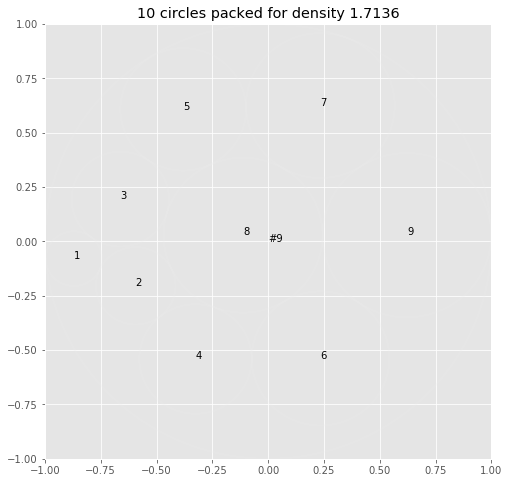

In [86]:
circles = circlify.circlify([9, 8, 7, 6, 5, 4, 3, 2, 1], show_enclosure=True, target_enclosure=circlify.Circle(x=0, y=0, r=1))
	# (necessary) data: A list of positive values sorted from largest to smallest
  	# (optional) target_enclosure: A target enclosure where the packed circles should fit (default to the unit circle (0, 0, 1))
  	# (optional) show_enclosure: A boolean indicating if the target enclosure should be appended to the output (default to False)

pprint(circles)
circlify.bubbles(circles=circles) # Graph of the packed circles

## Assignment

In the code above, we learned how to streamline code to make it run over the complete data set.

Now that you can process *all* the data, you're ready for a more serious engagement with interpretation of historical questions, like:

* What are some of the ideas that changed in Congress over this time period? For instance, historians of this period frequently talk about the rise of a free-market ideology, a critique of the welfare state, arguments about the nature of democracy and America's role abroad. Can you support an argument about intellectual change on the basis of the changing context in which words were discussed?
* What groups of people were talked about in this period, and did the way they were spoken about change? Consider the role of women, minorities, the gay movement, and individuals who identify as religious in your answer.
* How did America's relationship with other nations change during this time period?  A historian might consider, for starters, the fall of the Berlin Wall in 1989 and the disintegration of the former USSR; the rise of terrorism, and the identification of Iraq, Iran, and Afghanistan as a frontier for US pacification; the border with Mexico and issues of immigration. Can you find systematic evidence of when and how one or more of these conversations changed in the data?

Choose one of the above questions. Iterate through a series of keyword queries and data results that would support a robust answer. Formulate an answer with at least one visualization and a page of writing, single-spaced, which analyze historical change in detail.